In [1]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit import ClassicalRegister, QuantumRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
import numpy as np

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [2]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

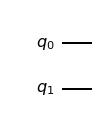

In [3]:
n = 2
grover_circuit = QuantumCircuit(n)
grover_circuit.draw('mpl')

In [4]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

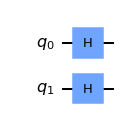

In [5]:
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw('mpl')

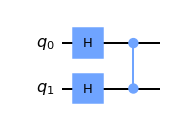

In [6]:
grover_circuit.cz(0,1) # Oracle
grover_circuit.draw('mpl')

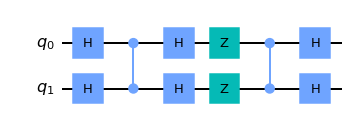

In [7]:
# Diffusion operator (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw('mpl')

In [8]:
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(grover_circuit)
result = sv_sim.run(qobj).result()
statevec = result.get_statevector()
from qiskit_textbook.tools import vector2latex
vector2latex(statevec, pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

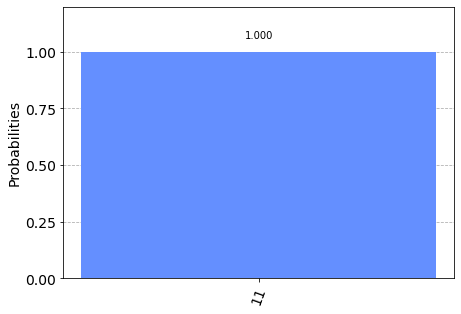

In [9]:
grover_circuit.measure_all()

qasm_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(grover_circuit)
result = qasm_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [10]:
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

Running on current least busy device:  ibmq_belem


In [11]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
qobj = assemble(transpiled_grover_circuit)
job = device.run(qobj)
job_monitor(job, interval=2)

<ipython-input-11-7f056d7fd138>:5: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = device.run(qobj)


Job Status: job has successfully run


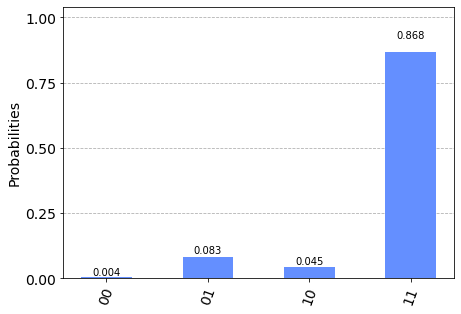

In [12]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)


# classical bits
# quantum bits
# particle-wave duality
# principles?
    - superposition
    - entanglement
    - interference - graphics
# card search



In [13]:
cards = [0,0,0,1]
cards

[0, 0, 0, 1]

In [ ]:
# 1-0: '00'
# 2-0: '01'
# 3-0: '10'
# 4-1: '11'

In [15]:
def card_finder(card):
    found = False
    queen = 1

    if card == queen:
        found = True
        print("found the card")
    else:
        print("not found")
    return found

In [16]:
for i, card in enumerate(cards):
    if card_finder(card):
        print("Card found at position ", i)
        break

not found
not found
not found
found the card
Card found at position  3


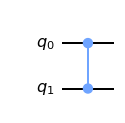

In [17]:
bbox = QuantumCircuit(2, name="blackbox")
#bbox.cz(0,1)
bbox.cz(1,0)
bbox.to_gate()
bbox.draw('mpl')

In [18]:
backend = Aer.get_backend('statevector_simulator')

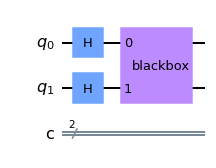

In [19]:
grover_circuit = QuantumCircuit(2,2)
grover_circuit.h([0,1])
grover_circuit.append(bbox, [0,1])
grover_circuit.draw('mpl')

In [20]:
job = execute(grover_circuit, backend)
result = job.result()

In [21]:
result.get_statevector()

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

In [22]:
sv = result.get_statevector()
np.around(sv, 2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

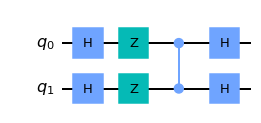

In [23]:
reflection = QuantumCircuit(2, name="Reflection")
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()
reflection.draw('mpl')

In [24]:
backend = Aer.get_backend('qasm_simulator')

grover_circuit = QuantumCircuit(2,2)
grover_circuit.h([0,1])
grover_circuit.append(bbox, [0,1])
grover_circuit.append(reflection, [0,1])
grover_circuit.measure([0,1], [0,1])

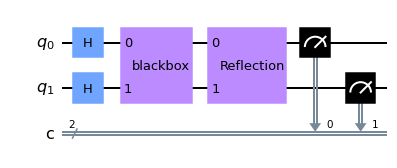

In [25]:
grover_circuit.draw('mpl')

In [26]:
job = execute(grover_circuit, backend, shots=10)
result = job.result()
result.get_counts()

{'11': 10}

In [27]:
import math
from qiskit.tools.monitor import job_monitor

pi = math.pi
q = QuantumRegister(4,'q')
c = ClassicalRegister(4,'c')
qc = QuantumCircuit(q,c)

print('\nInitialising Circuit...\n')

### Initialisation ###

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])

print('\nPreparing Oracle circuit....\n')

'''
### 0000 Oracle ###

qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])

'''

### 0001 Oracle ###

qc.x(q[1])
qc.x(q[2])
qc.x(q[3])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[1])
qc.x(q[2])
qc.x(q[3])


'''
### 0010 Oracle ###

qc.x(q[0])
qc.x(q[2])
qc.x(q[3])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[0])
qc.x(q[2])
qc.x(q[3])
'''

'''
### 0011 Oracle ###

qc.x(q[2])
qc.x(q[3])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[2])
qc.x(q[3])
'''

'''
### 0100 Oracle ###

qc.x(q[0])
qc.x(q[1])
qc.x(q[3])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[0])
qc.x(q[1])
qc.x(q[3])
'''

'''
### 0101 Oracle ###

qc.x(q[1])
qc.x(q[3])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[1])
qc.x(q[3])
'''

'''
### 0110 Oracle ###

qc.x(q[0])
qc.x(q[3])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[0])
qc.x(q[3])
'''

'''
### 0111 Oracle ###

qc.x(q[3])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[3])
'''

'''
### 1000 Oracle ###

qc.x(q[0])
qc.x(q[1])
qc.x(q[2])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
'''

'''
### 1001 Oracle ###

qc.x(q[1])
qc.x(q[2])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[1])
qc.x(q[2])
'''

'''
### 1010 Oracle ###

qc.x(q[0])
qc.x(q[2])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[0])
qc.x(q[2])
'''

'''
### 1011 Oracle ###

qc.x(q[3])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[3])
'''

'''
### 1100 Oracle ###

qc.x(q[0])
qc.x(q[1])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[0])
qc.x(q[1])
'''

'''
### 1101 Oracle ###

qc.x(q[1])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[1])
'''

'''
### 1110 Oracle ###

qc.x(q[0])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[0])
'''

'''
###1111 Oracle###

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
'''

print('\nPreparing Amplification circuit....\n')
#### Amplification ####

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])

qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])

### Measurment ###
qc.barrier(q)
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])
qc.measure(q[3], c[3])

backend = provider.get_backend('ibmq_qasm_simulator')
print('\nExecuting job....\n')
job = execute(qc, backend, shots=100)

job_monitor(job)
counts = job.result().get_counts()

print('RESULT: ',counts,'\n')
print('Press any key to close')
input()


Initialising Circuit...


Preparing Oracle circuit....


Preparing Amplification circuit....


Executing job....



<ipython-input-27-0da00c4609c1>:55: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qc.cu1(pi/4, q[0], q[3])


Job Status: job has successfully run
RESULT:  {'0000': 3, '0001': 38, '0010': 5, '0011': 4, '0100': 5, '0101': 4, '0110': 5, '0111': 2, '1000': 4, '1001': 5, '1010': 4, '1011': 2, '1100': 8, '1101': 4, '1110': 4, '1111': 3} 

Press any key to close



''

In [28]:
def oracle(qc, card):
    ### 0000 Oracle ###
    if card == "0000":
        qc.x(q[0])
        qc.x(q[1])
        qc.x(q[2])
        qc.x(q[3])

        qc.cu1(pi/4, q[0], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(-pi/4, q[1], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(pi/4, q[1], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])

        qc.x(q[0])
        qc.x(q[1])
        qc.x(q[2])
        qc.x(q[3])

    elif card == "0001":
        ### 0001 Oracle ###

        qc.x(q[1])
        qc.x(q[2])
        qc.x(q[3])

        qc.cu1(pi/4, q[0], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(-pi/4, q[1], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(pi/4, q[1], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])

        qc.x(q[1])
        qc.x(q[2])
        qc.x(q[3])

    elif card == "0010":
        ### 0010 Oracle ###

        qc.x(q[0])
        qc.x(q[2])
        qc.x(q[3])

        qc.cu1(pi/4, q[0], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(-pi/4, q[1], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(pi/4, q[1], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])

        qc.x(q[0])
        qc.x(q[2])
        qc.x(q[3])

    elif card == "0011":
        ### 0011 Oracle ###

        qc.x(q[2])
        qc.x(q[3])

        qc.cu1(pi/4, q[0], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(-pi/4, q[1], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(pi/4, q[1], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])

        qc.x(q[2])
        qc.x(q[3])

    elif card == "0100":
        ### 0100 Oracle ###

        qc.x(q[0])
        qc.x(q[1])
        qc.x(q[3])

        qc.cu1(pi/4, q[0], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(-pi/4, q[1], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(pi/4, q[1], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])

        qc.x(q[0])
        qc.x(q[1])
        qc.x(q[3])

    elif card == "0101":
        ### 0101 Oracle ###

        qc.x(q[1])
        qc.x(q[3])

        qc.cu1(pi/4, q[0], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(-pi/4, q[1], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(pi/4, q[1], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])

        qc.x(q[1])
        qc.x(q[3])

    elif card == "0110":
        ### 0110 Oracle ###

        qc.x(q[0])
        qc.x(q[3])

        qc.cu1(pi/4, q[0], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(-pi/4, q[1], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(pi/4, q[1], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])

        qc.x(q[0])
        qc.x(q[3])

    elif card == "0111":
        ### 0111 Oracle ###

        qc.x(q[3])

        qc.cu1(pi/4, q[0], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(-pi/4, q[1], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(pi/4, q[1], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])

        qc.x(q[3])

    elif card == "1000":
        ### 1000 Oracle ###

        qc.x(q[0])
        qc.x(q[1])
        qc.x(q[2])

        qc.cu1(pi/4, q[0], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(-pi/4, q[1], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(pi/4, q[1], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])

        qc.x(q[0])
        qc.x(q[1])
        qc.x(q[2])

    elif card == "1001":
        ### 1001 Oracle ###

        qc.x(q[1])
        qc.x(q[2])

        qc.cu1(pi/4, q[0], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(-pi/4, q[1], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(pi/4, q[1], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])

        qc.x(q[1])
        qc.x(q[2])

    elif card == "1010":
        ### 1010 Oracle ###

        qc.x(q[0])
        qc.x(q[2])

        qc.cu1(pi/4, q[0], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(-pi/4, q[1], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(pi/4, q[1], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])

        qc.x(q[0])
        qc.x(q[2])

    elif card == "1011":
        ### 1011 Oracle ###

        qc.x(q[3])

        qc.cu1(pi/4, q[0], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(-pi/4, q[1], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(pi/4, q[1], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])

        qc.x(q[3])

    elif card == "1100":
        ### 1100 Oracle ###

        qc.x(q[0])
        qc.x(q[1])

        qc.cu1(pi/4, q[0], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(-pi/4, q[1], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(pi/4, q[1], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])

        qc.x(q[0])
        qc.x(q[1])

    elif card == "1101":
        ### 1101 Oracle ###

        qc.x(q[1])

        qc.cu1(pi/4, q[0], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(-pi/4, q[1], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(pi/4, q[1], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])

        qc.x(q[1])

    elif card == "1110":
        ### 1110 Oracle ###

        qc.x(q[0])

        qc.cu1(pi/4, q[0], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(-pi/4, q[1], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(pi/4, q[1], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])

        qc.x(q[0])

    elif card == "1111":
        ###1111 Oracle###

        qc.cu1(pi/4, q[0], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(-pi/4, q[1], q[3])
        qc.cx(q[0], q[1])
        qc.cu1(pi/4, q[1], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])
        qc.cx(q[1], q[2])
        qc.cu1(-pi/4, q[2], q[3])
        qc.cx(q[0], q[2])
        qc.cu1(pi/4, q[2], q[3])
    
    return qc


Initialising Circuit...


Preparing Oracle circuit....



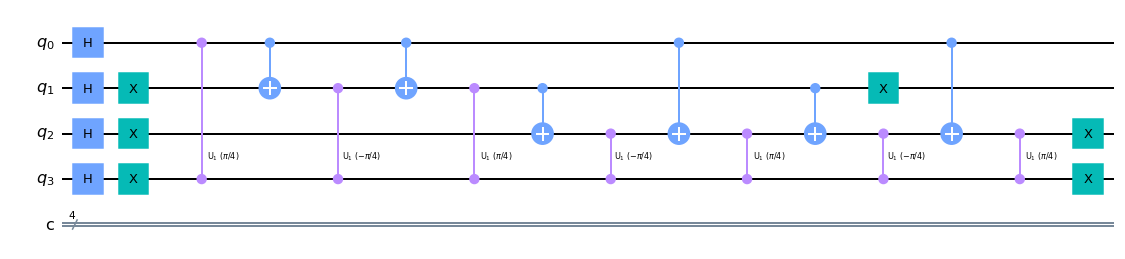

In [32]:
import math
from qiskit.tools.monitor import job_monitor

card_dict = {
    "king_spade": "0000",
    "queen_spade": "0001",
    "jack_spade": "0010",
    "ace_spade": "0011",
    "king_heart": "0100",
    "queen_heart": "0101",
    "jack_heart": "0110",
    "ace_heart": "0111",
    "king_diamond": "1000",
    "queen_diamond": "1001",
    "jack_diamond": "1010",
    "ace_diamond": "1011",
    "one_heart": "1100",
    "two_diamond": "1101",
    "three_diamond": "1110",
    "joker": "1111",
}


pi = math.pi
q = QuantumRegister(4,'q')
c = ClassicalRegister(4,'c')
qc = QuantumCircuit(q,c)

print('\nInitialising Circuit...\n')

### Initialisation ###

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])

print('\nPreparing Oracle circuit....\n')



card = card_dict["king_spade"]
card = card_dict["joker"]
card = card_dict["three_diamond"]
card = card_dict["queen_spade"]

qc = oracle(qc, card)
qc.draw('mpl')


Preparing Amplification circuit....


Executing job....

Job Status: job has successfully run


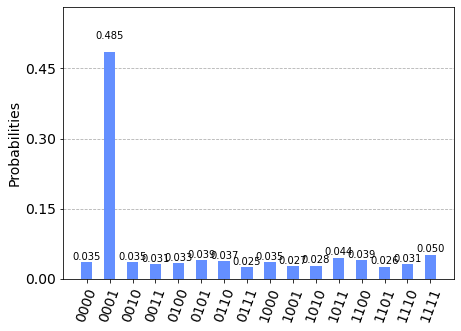

In [33]:
print('\nPreparing Amplification circuit....\n')
#### Amplification ####

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])

qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])

### Measurment ###
qc.barrier(q)
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])
qc.measure(q[3], c[3])

backend = provider.get_backend('ibmq_qasm_simulator')
print('\nExecuting job....\n')
job = execute(qc, backend, shots=1000)

job_monitor(job)
counts = job.result().get_counts()
plot_histogram(counts)

In [34]:
print(card_dict.keys())

dict_keys(['king_spade', 'queen_spade', 'jack_spade', 'ace_spade', 'king_heart', 'queen_heart', 'jack_heart', 'ace_heart', 'king_diamond', 'queen_diamond', 'jack_diamond', 'ace_diamond', 'one_heart', 'two_diamond', 'three_diamond', 'joker'])
